In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
pd.options.display.max_columns = 30
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
df = pd.read_csv('Seattle_Hotels.csv', encoding="latin-1")
# 数据探索
print(df.head())
print('数据集中的酒店个数：', len(df))

ModuleNotFoundError: No module named 'nltk'

In [2]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print('第10个酒店的描述：')
print_description(10)

第10个酒店的描述：
Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle


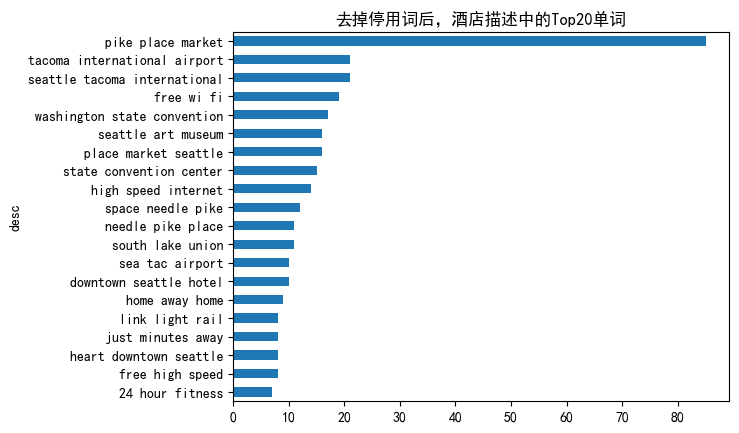

In [3]:
# 得到酒店描述中n-gram特征中的TopK个
def get_top_n_words(corpus, n=1, k=None):
    # 统计ngram词频矩阵
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    """
    print('feature names:')
    print(vec.get_feature_names())
    print('bag of words:')
    print(bag_of_words.toarray())
    """
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # 按照词频从大到小排序
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]
common_words = get_top_n_words(df['desc'], 3, 20)
#print(common_words)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [4]:
# 文本预处理
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# 加载停用词
STOPWORDS = set(stopwords.words('english'))
# 对文本进行清洗
def clean_text(text):
    # 全部小写
    text = text.lower()
    # 用空格替代一些特殊符号，如标点
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # 移除BAD_SYMBOLS_RE
    text = BAD_SYMBOLS_RE.sub('', text)
    # 从文本中去掉停用词
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
# 对desc字段进行清理，apply针对某列
df['desc_clean'] = df['desc'].apply(clean_text)
#print(df['desc_clean'])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\cheny/nltk_data'
    - 'D:\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'D:\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'D:\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\cheny\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
